# Duboko učenje: Četvrta laboratorijska vježba

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import src.utils as utils

## Ograničeni Boltzmanov stroj

### 1. zadatak

Implementirajte RBM koji koristi CD-1 za učenje. Ulazni podaci neka su MNIST brojevi. Vidljivi sloj tada mora imati 784 elementa, a skriveni sloj neka ima 100 elemenata. Kako su vrijednosti ulaznih uzoraka (slika) realne u rasponu [0 1], oni mogu poslužiti kao p(vi=1) pa za inicijalne vrijednosti vidljivog sloja trebate provesti uzorkovanje. Koristitie mini grupe veličine 100 uzoraka, a treniranje neka ima 100 epoha.

In [2]:
from importlib import reload
import src.rbm as rbm
reload(rbm)

<module 'src.rbm' from '/home/lumba/Programming/Python/deep-learning/dl-lab4/src/rbm.py'>

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("res/mnist_data", one_hot=True)
train_X, train_Y, test_X, test_Y = mnist.train.images, mnist.train.labels, mnist.test.images,\
    mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting res/mnist_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting res/mnist_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting res/mnist_data/t10k-images-idx3-ubyte.gz
Extracting res/mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


#### 1.1
Vizualizirajte težine W ostvarene treniranjem te pokušajte interpretirati ostvarene težine pojedinih skrivenih neurona.

In [4]:
model = rbm.RBM((10, 10), (28, 28))

model.fit(mnist, mnist.train.num_examples, trace=True)

0 0.25810796
5500 0.023253735
11000 0.020941554
16500 0.02016874
22000 0.020851836
27500 0.019819714
33000 0.018473249
38500 0.018957915
44000 0.019503944
49500 0.018276835


array([0.25810796, 0.02325374, 0.02094155, 0.02016874, 0.02085184,
       0.01981971, 0.01847325, 0.01895791, 0.01950394, 0.01827683],
      dtype=float32)

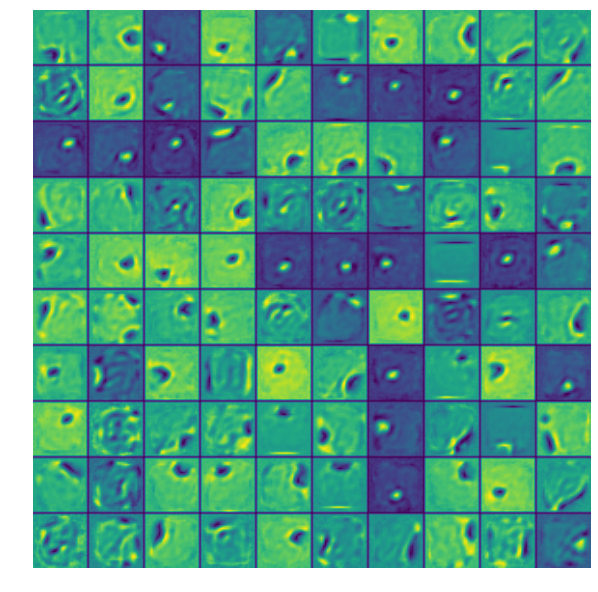

In [5]:
w1s, vb1s, hb1s, vr, h1s = model.eval(test_X, 5000)
model.save_model("res/models/rbm_1.pickle")

rbm.draw_weights(w1s, model.v_shape, model.N_h, model.h1_shape)

#### 1.2
Vizualizirajte rezultate rekonstrukcije prvih 20 testnih uzoraka MNIST baze. Kao rezultat rekonstukcije koji ćete prikazati, koristite p(vi=1)=σ(∑Nj=1wjihj+ai), umjesto binarnih vrijednosti dobivenih uzorkovanjem.

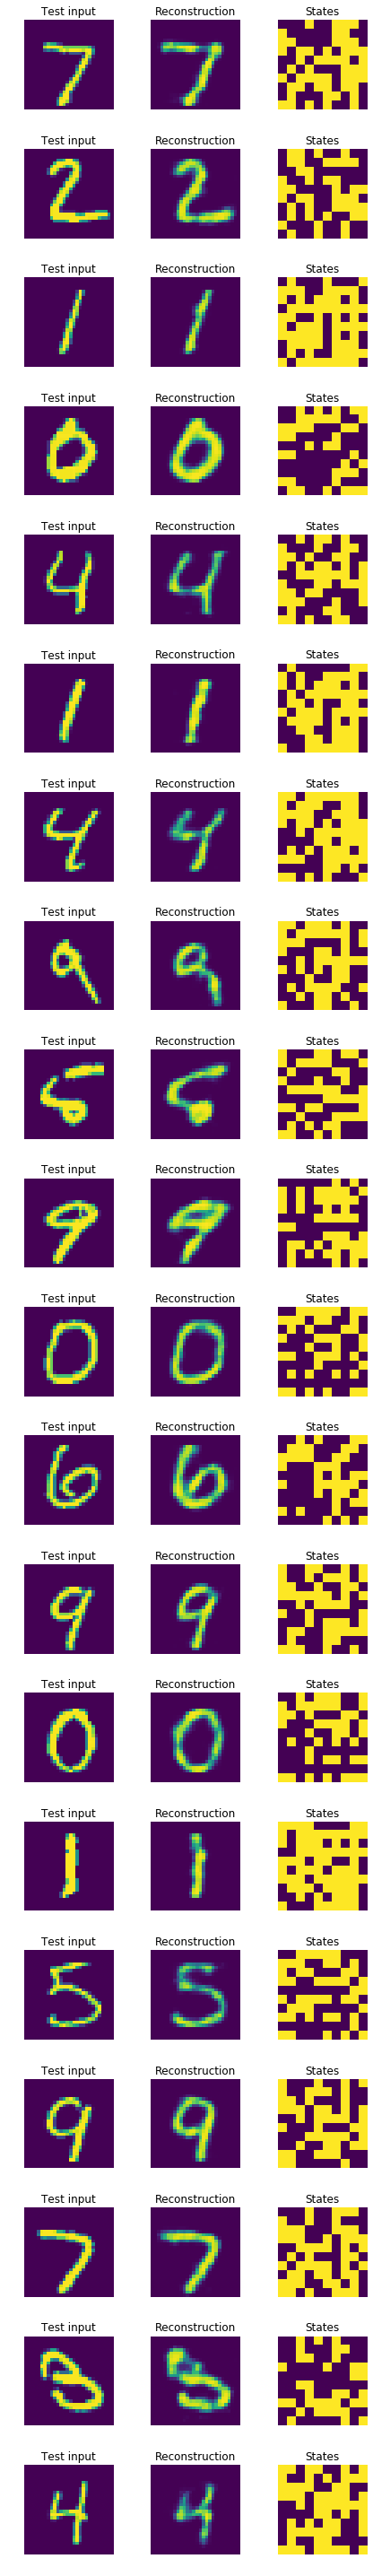

In [6]:
rbm.draw_reconstructions(test_X, vr, h1s, model.v_shape, model.h1_shape, 20)

#### 1.3
Ispitajte učestalost uključenosti elemenata skrivenog sloja te vizualizirajte naučene težine W soritrane prema učestalosti

Text(0.5, 1.0, 'Sortirane matrice tezina - od najucestalijih do najmanje koristenih')

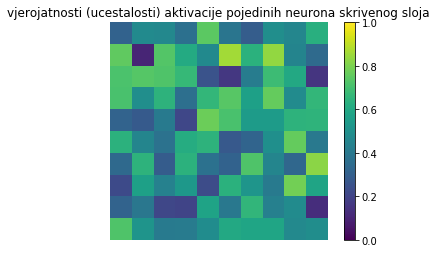

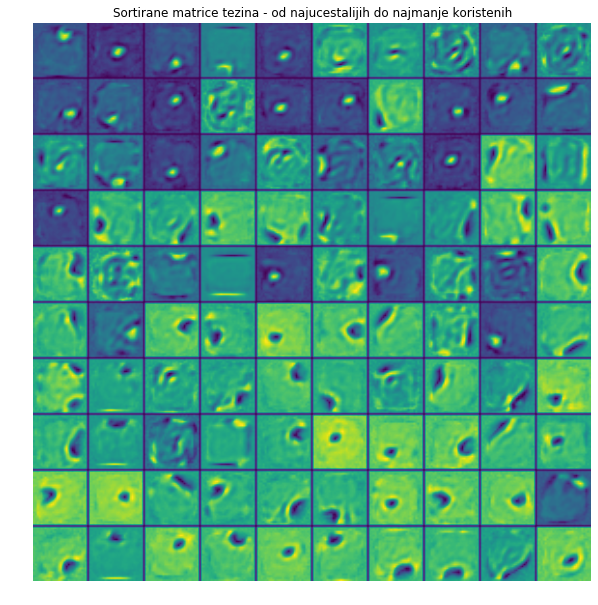

In [7]:
# Vjerojatnost da je skriveno stanje uključeno kroz Nu ulaznih uzoraka
plt.figure()
tmp = (h1s.sum(0)/h1s.shape[0]).reshape(model.h1_shape)
plt.imshow(tmp, vmin=0, vmax=1, interpolation="nearest")
plt.axis('off')
plt.colorbar()
plt.title('vjerojatnosti (ucestalosti) aktivacije pojedinih neurona skrivenog sloja')

# Vizualizacija težina sortitranih prema učestalosti
tmp_ind = (-tmp).argsort(None)
rbm.draw_weights(w1s[:, tmp_ind], model.v_shape, model.N_h, model.h1_shape)
plt.title('Sortirane matrice tezina - od najucestalijih do najmanje koristenih')

#### 1.4
Preskočite inicijalno uzorkovanje/binarizaciju na temelju ulaznih uzoraka, već ulazne uzorke (realne u rasponu [0 1]) koristiti kao ualzne vektore v. Koliko se tako dobijeni RBM razlikuje od prethodnog?

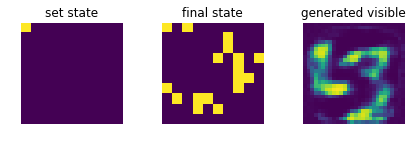

In [15]:
# Generiranje uzoraka iz slučajnih vektora
r_input = np.random.rand(100, model.N_h)
r_input[r_input > 0.9] = 1 # postotak aktivnih - slobodno varirajte
r_input[r_input < 1] = 0
r_input = r_input * 20 # pojačanje za slučaj ako je mali postotak aktivnih

s = 10
i = 0
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s

model.out1 = model.session.run((model.v1), feed_dict={model.h0: r_input})

for i in range(1000):
    out_1_prob, out_1, hout1 = model.session.run((model.v1_prob, model.v1, model.h1), feed_dict={model.X1: model.out1})

rbm.draw_generated(r_input, hout1, out_1_prob, model.v_shape, model.h1_shape, 1)

#### 1.5
Povećajte broj Gibsovih uzorkovanja k u CD-k. Koje su razlike?

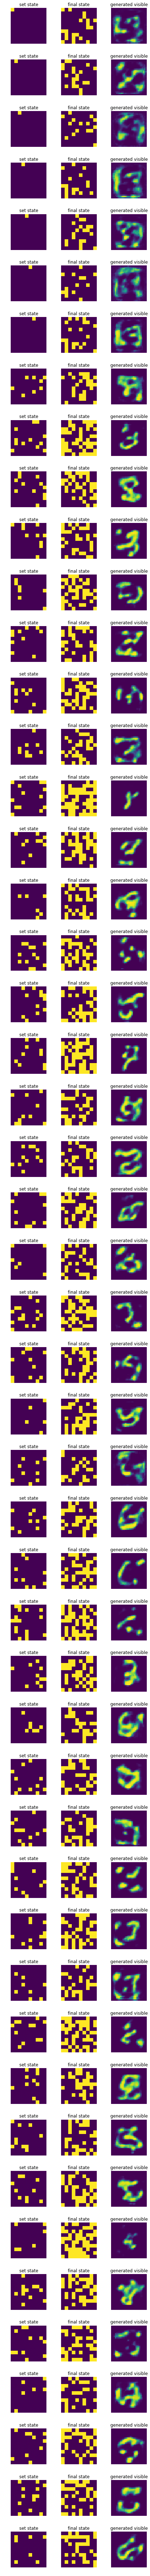

In [16]:
# Emulacija dodatnih Gibbsovih uzorkovanja pomoću feed_dict
for i in range(1000):
    out_1_prob, out_1, hout1 = model.session.run((model.v1_prob, model.v1,model. h1), feed_dict={model.X1: model.out1})

rbm.draw_generated(r_input, hout1, out_1_prob, model.v_shape, model.h1_shape, 50)

#### 1.6
Ispitajte efekt variranja koeficijenta učenja.

In [17]:
errors = []

for alpha in np.linspace(0.1, 0.9, 9):
    curr_model = rbm.RBM((10, 10), (28, 28), alpha=alpha)
    errors.append(curr_model.fit(mnist, mnist.train.num_examples))

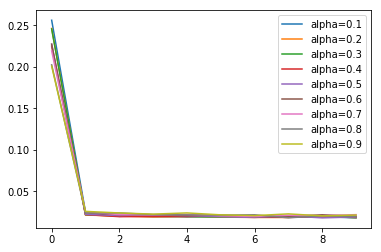

In [20]:
[plt.plot(range(len(e)), e, label="alpha=%.1f" % alpha) for e, alpha in zip(errors, np.linspace(0.1, 0.9, 9))]
plt.legend()
plt.show()

#### 1.7
Slučajno inicijalizirjte skriveni sloj, provedite nekoliko Gibbsovih uzorkovanje te vizualizirajte generirane uzorke vidljivog sloja

#### 1.8
Provedite prethodne eksperimente za manji i veći broj skrivenih neurona. Što opažate kod težina i rekonstrukcija?

### 2. zadatak

Deep beleif Network (DBN) je duboka mreža koja se dobije slaganjem više RBM-ova jednog na drugi, pri čemu se svaki sljedeći RBM pohlepno trenira pomoću skrivenog (“izlaznog”) sloja prethodnog RBM-a (osim prvog RBM-a koji se trenira direktno s ulaznim uzorcima). Teoretski, tako izgrađen DBN trebao bi povećati p(v) što nam je i cilj. Korištenje DBN, odnosno rekonstrukcija ulaznog uzorka provodi se prema donjoj shemi. U prolazu prema gore određuju se skriveni slojevi iz vidljivog sloja dok se ne dođe do najgornjeg RBM-a, zatim se na njemu provede CD-k algoritam, nakon čega se, u prolasku prema dolje, određuju niži skriveni slojevi dok se ne dođe do rekonstruiranog vidljivog sloja. Težine između pojedinih slojeva su iste u prolazu gore kao i u prolazu prema dolje. Implementirajte troslojni DBN koji se sastoji od dva pohlepno pretrenirana RBM-a. Prvi RBM neka je isit kao i u 1. zadatku, a drugi RBM neka ima skriveni sloj od 100 elemenata.

In [23]:
import src.dbn as dbn

model2 = dbn.DBN('res/models/rbm_1.pickle', 784, 100, (10, 10))

vr2, h3_probs, h3s, errors = model2.fit_and_eval(mnist, mnist.train.num_examples, 
                                                 test_X, trace=True, weights_path='res/models/dbn_1.pickle')

Batch count:  0   Avg. reconstruction error:  0.10403227
Batch count:  5500   Avg. reconstruction error:  0.06683464
Batch count:  11000   Avg. reconstruction error:  0.0697071
Batch count:  16500   Avg. reconstruction error:  0.062443037
Batch count:  22000   Avg. reconstruction error:  0.061521225
Batch count:  27500   Avg. reconstruction error:  0.06253437
Batch count:  33000   Avg. reconstruction error:  0.06304858
Batch count:  38500   Avg. reconstruction error:  0.059245974
Batch count:  44000   Avg. reconstruction error:  0.060368434
Batch count:  49500   Avg. reconstruction error:  0.061562277


#### 2.1
Vizualizirajte težine W1 i W2 ostvarene treniranjem.

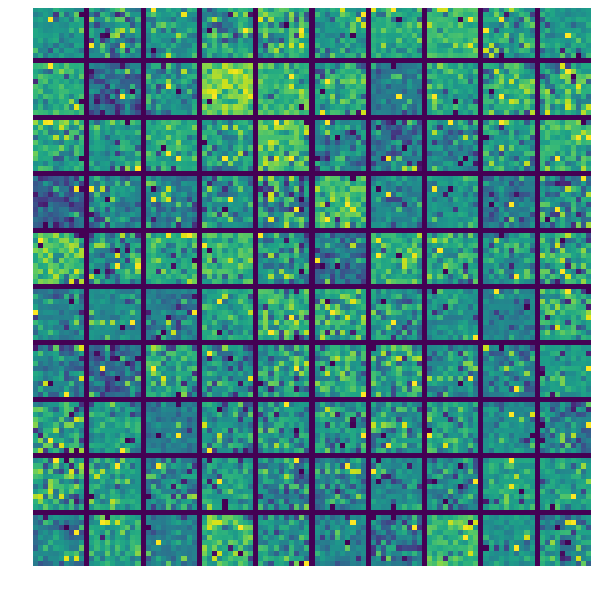

In [42]:
reload(dbn)
reload(utils)

w1s, w2s, h_b1s, v_b1s, hb2s, vb2s = utils.load_model('res/models/dbn_1.pickle')

dbn.draw_weights(w2s, model2.h2_shape, model2.N_h2, model2.h2_shape, interpolation="nearest")

#### 2.2
Vizualizirajte rezultate rekonstrukcije prvih 20 testnih uzoraka MNIST baze.

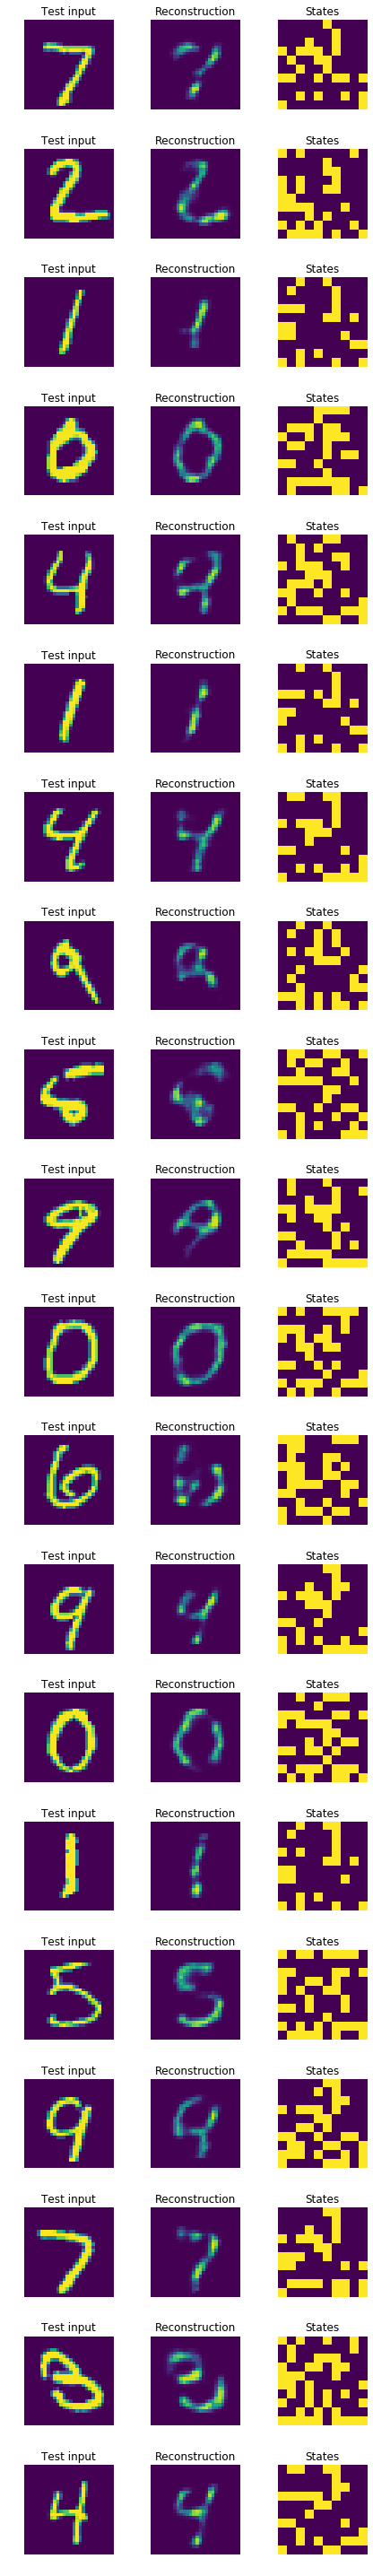

In [44]:
dbn.draw_reconstructions(test_X, vr2, h3s, model.v_shape, model2.h2_shape, 20)

#### 2.3
Slučajno inicijalizirjte krovni skriveni sloj, provedite nekoliko Gibbsovih uzorkovanje te vizualizirajte generirane uzorke vidljivog sloja - usporedite s prethodnim zadatkom

In [ ]:
# TODO

#### 2.4
Postavite broj skrivenih varijabli gornjeg RBM-a jednak broju elemenata vidljivog sloja donjeg RBM-a, a inicijalne težine W2 postavite na WT1. Koji su efekti promjene? Vizualizirajte uzorke krovnog skrivenog sloja kao matrice 28x28.

In [ ]:
# TODO

### 3. zadatak
Implementirajte postupak generativnog fine-tuninga na DBN iz 2. zadatka. Za treniranje gornjeg RBM-a koristite CD-2.

In [54]:
# TODO

#### 3.1
Vizualizirajte konačne varijante matrica W′ i R.

In [55]:
# TODO

#### 3.2
Vizualizirajte rezultate rekonstrukcije prvih 20 testnih uzoraka MNIST baze.

In [56]:
# TODO

#### 3.3
Slučajno inicijalizirjte krovnni skriveni sloj, provedite nekoliko Gibbsovih uzorkovanje te vizualizirajte generirane uzorke vidljivog sloja - usporedite s prethodnim zadacima

In [55]:
model.session.close()
model2.session.close()

## Varijacijski autoenkoder (VAE)

### 4. zadatak
Implementirajte VAE sa 20 skrivenih varijabli z. Ulazni podaci neka su MNIST brojevi. Enkoder i dekoder neka imaju po dva skrivena sloja, svaki sa 200 neurona sa “softplus” aktivacijskim funkcijama.

In [94]:
import src.vae as vae
reload(vae)

encoder_config = (200, 200)
decoder_config = (200, 200)
hidden_config = 20
n_features = 28*28
input_shape = (28, 28)

model4 = vae.VAE(encoder_config, decoder_config, hidden_config, input_shape)

/home/lumba/anaconda3/lib/python3.5/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [95]:
train_writer = tf.summary.FileWriter('res/vae/train', model4.session.graph)

model4.fit(mnist, mnist.train.num_examples, trace=True, train_writer=train_writer)

Epoch: 0001 cost= 175.227860940
Epoch: 0011 cost= 108.301658395
Epoch: 0021 cost= 105.293756312
Epoch: 0031 cost= 104.208172177
Epoch: 0041 cost= 103.416660961
Epoch: 0051 cost= 102.938403612
Epoch: 0061 cost= 102.505759583
Epoch: 0071 cost= 102.161201560
Epoch: 0081 cost= 101.923260859
Epoch: 0091 cost= 101.650882180


In [96]:
train_writer.close()

#### 4.1 

Vizualizirajte rezultate rekonstrukcije za prvih 20 testnih uzoraka MNIST baze.

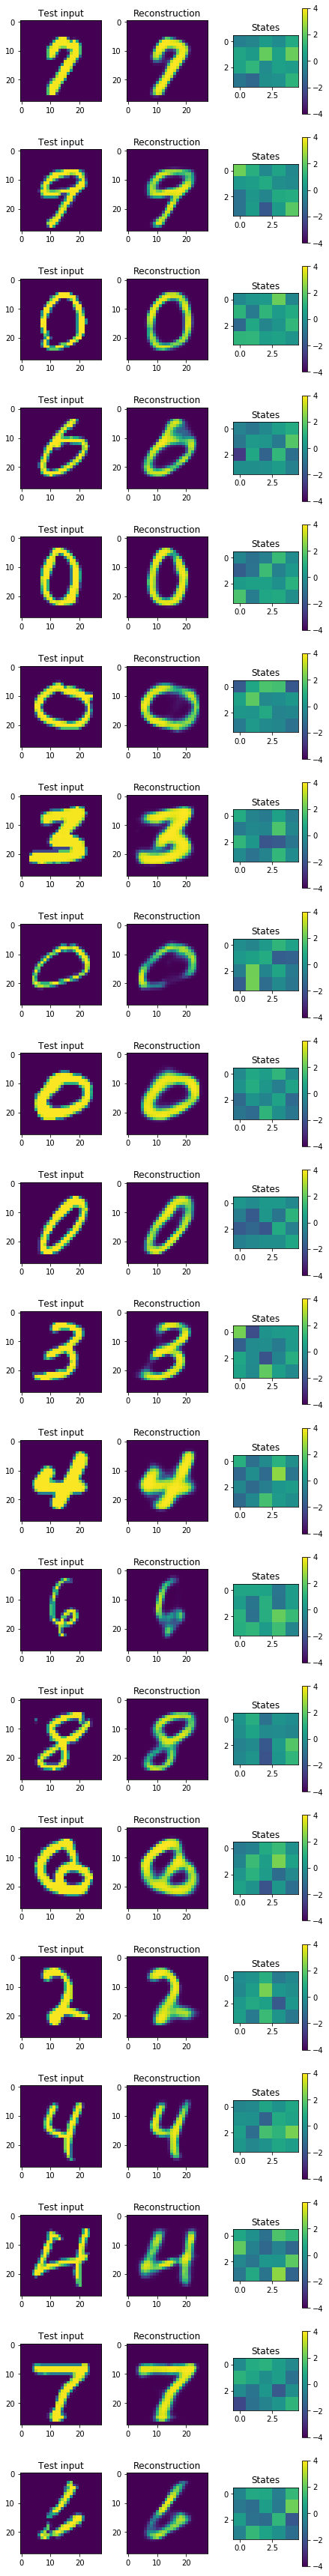

In [97]:
x_sample = mnist.test.next_batch(100)[0]
x_reconstruct, z_out = model4.session.run([model4.x_reconstr_mean_out, model4.z],
                                feed_dict={model4.x: x_sample})

vae.draw_reconstructions(x_sample, x_reconstruct, z_out, (28, 28), (4, 5))

#### 4.2
Vizualizirajte distribucije srednjih vrijednosti i standardnih devijacija skrivenih varijabli z za primjereni broj ulaznih uzoraka

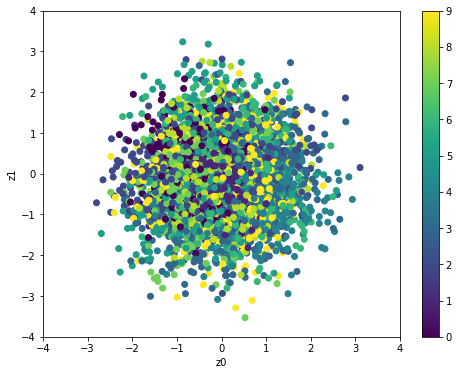

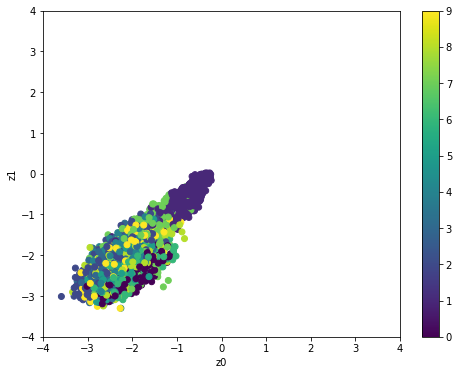

In [111]:
# Vizualizacija raspored testnih uzoraka u 2D prostoru skrivenih varijabli - 1. način
x_sample, y_sample = mnist.test.next_batch(5000)
z_mu, z_sigma = model4.z_mean_and_sigma(x_sample)

vae.plot_latent(z_mu, y_sample)
#save_latent_plot('trt.png')

vae.plot_latent(z_sigma, y_sample)
#save_latent_plot('trt.png')

#### 4.3
Vizualizirajte raspored testnih uzoraka u 2D prostoru skrivenih varijabli.

In [112]:
# TODO

#### 4.4
Ponovite eksperimente iz prethodnih podzadataka za samo 2 elementa u skrivenenom sloju z.

In [113]:
model4_1 = vae.VAE(encoder_config, decoder_config, 2, input_shape)

/home/lumba/anaconda3/lib/python3.5/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [114]:
train_writer = tf.summary.FileWriter('res/vae/train', model4_1.session.graph)

model4_1.fit(mnist, mnist.train.num_examples, trace=True, train_writer=train_writer)

Epoch: 0001 cost= 196.225507147
Epoch: 0011 cost= 166.555556502
Epoch: 0021 cost= 161.778899786
Epoch: 0031 cost= 158.313187644
Epoch: 0041 cost= 155.428343423
Epoch: 0051 cost= 153.164168396
Epoch: 0061 cost= 151.621603782
Epoch: 0071 cost= 150.374898265
Epoch: 0081 cost= 149.366234519
Epoch: 0091 cost= 148.496738309


/home/lumba/anaconda3/lib/python3.5/site-packages/matplotlib/image.py:863: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  self.axes.set_xlim((xmin, xmax), auto=None)


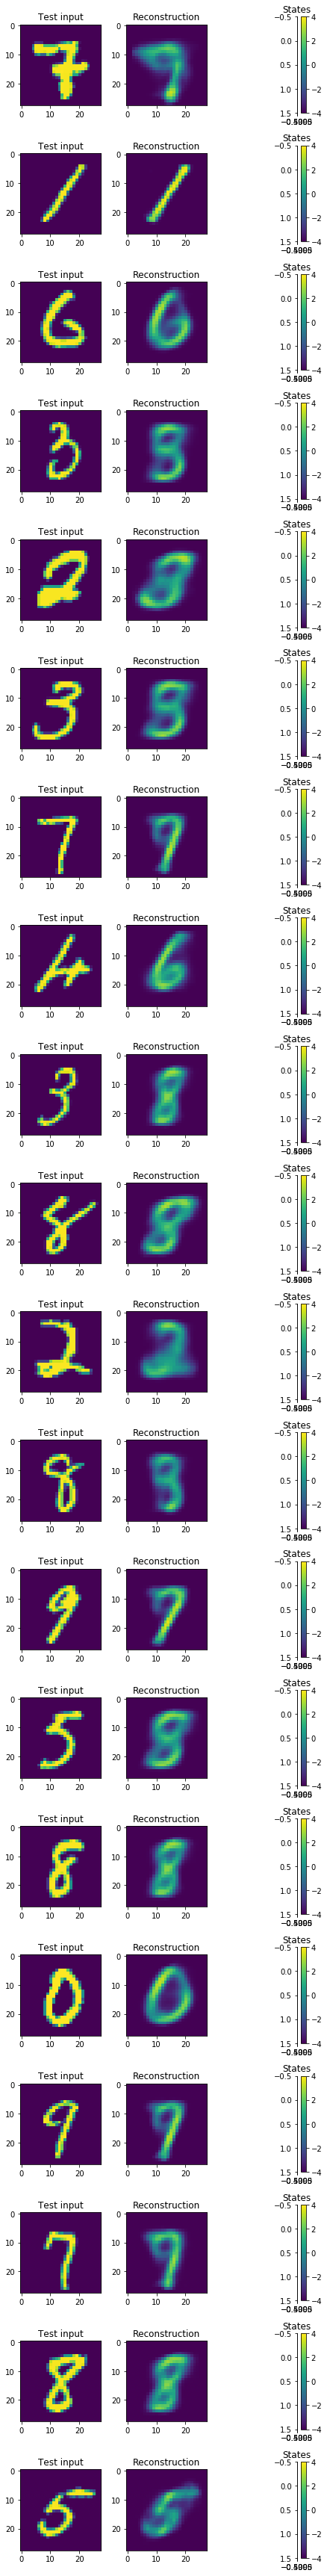

In [118]:
x_sample = mnist.test.next_batch(100)[0]
x_reconstruct, z_out = model4_1.session.run([model4_1.x_reconstr_mean_out, model4_1.z],
                                feed_dict={model4_1.x: x_sample})

vae.draw_reconstructions(x_sample, x_reconstruct, z_out, (28, 28), (2, 0))

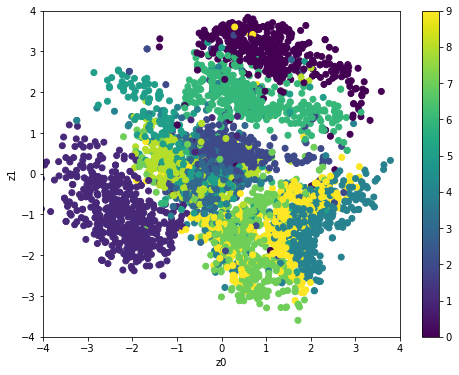

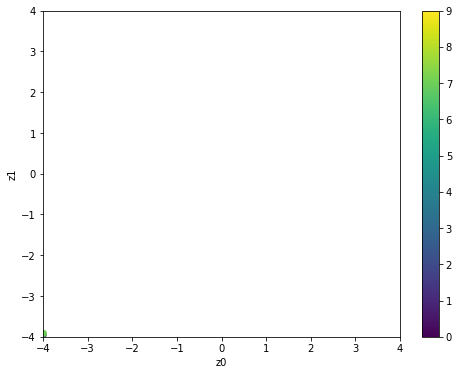

In [119]:
# Vizualizacija raspored testnih uzoraka u 2D prostoru skrivenih varijabli - 1. način
x_sample, y_sample = mnist.test.next_batch(5000)
z_mu, z_sigma = model4_1.z_mean_and_sigma(x_sample)

vae.plot_latent(z_mu, y_sample)
#save_latent_plot('trt.png')

vae.plot_latent(z_sigma, y_sample)
#save_latent_plot('trt.png')

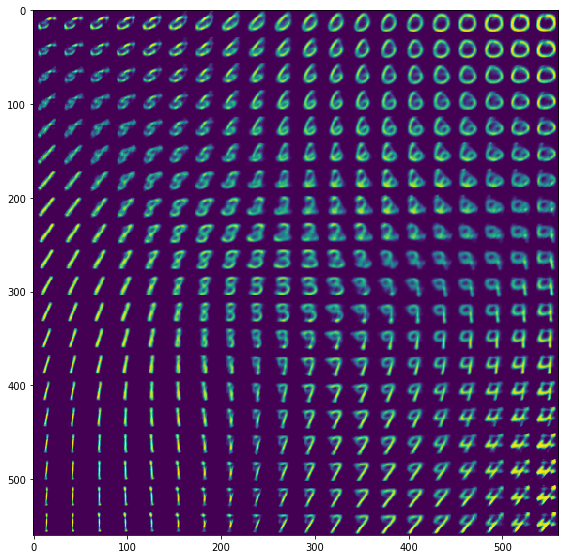

In [120]:
nx = ny = 20
x_values = np.linspace(-3, 3, nx)
y_values = np.linspace(-3, 3, ny)

canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        z_mu = np.array([[xi, yi]])
        x_mean = model4_1.session.run(model4_1.x_reconstr_mean_out, feed_dict={model4_1.z: np.repeat(z_mu,100,0)})
        canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = x_mean[0].reshape(28, 28)

plt.figure(figsize=(8, 10))        
Xi, Yi = np.meshgrid(x_values, y_values)
plt.imshow(canvas, origin="upper")
plt.tight_layout()

#### 4.5 (bonus)
Predložak za 4. zadatak sadrži kod za prikupljanje podataka koji se mogu prikazati pomoću Tensorboard. Pokrenite Tensorboard i provjerite koje su informacije dostupne o treniranom VAE.

In [121]:
# tensorboard --logdir=res/models/vae/train
# http://localhost:6006/

## Generative asdversarial networks (GAN)

### 5. zadatak
Implementirajte DCGAN s generatorom (4 konvolucijska sloja) i diskriminatorom (3 konvolucijska sloja). U svim konvolucijama koristite veličinu jezgre [4,4], osim u izlaznom sloju diskriminatora, a broj kanala od ulaza prema izlazu neka bude G: 512, 256, 128, 1 i D: 64, 128, 1. Ulaz u generator z neka ima 100 elemenata prema normalnoj distribuciji N(0,1). Ulazni podaci neka su MNIST brojevi skalirani na veličinu 32x32 te treniranje provedite kroz barem 20 epoha. U jednoj iteraciji provedite jednu optimizaciju generatora i jednu optimizaciju diskriminatora s po jednom mini grupom. Koristite tanh aktivacijsku funkciju za izlaz generatora i sigmoid aktivaciju za izlaz diskriminator.

In [2]:
import src.gan_2 as gan
import tensorflow as tf

tf.enable_eager_execution()

(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = tf.image.resize_images(train_images, [32, 32]).numpy()
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(100)

In [7]:
from importlib import reload
reload(gan)
model5 = gan.GAN()

In [9]:
from IPython import display
seed = tf.random_normal([16, 100])

model5.fit(train_dataset, seed, )

AttributeError: 'Adam' object has no attribute 'apply_gradients'

#### 5.1
Vizualizirajte rezultate generiranja 100 novih uzoraka iz slučajnih vektora z. Usporedite rezultate s uzorcima generiranim pomoću VAE.

#### 5.2
U jednoj iteraciji provedite treniranje diskriminatora sa dvaje minigrupe a generatora sa jednom minigrupom. Vizualizirajte generirane uzorke. Ponovite isti postupak samo zamijenite mjesta generatora i diskriminatora. Komentirajte retzultate.

In [68]:
# TODO

#### 5.3
Isključite batch normalizaciju u obje mreže. Komentirajte rezultate.

In [69]:
# TODO